In [1]:
from rich import print

import pandas as pd
import numpy as np

TEST = "../datasets/test"

TEST_FILE = TEST + "/test_dataset.csv"
preprocessed = TEST + "/preprocessed_tdata.csv"

dataset = pd.read_csv(TEST_FILE)

In [2]:
dataset.head()

,behavior,image_id,image_file,head_x,head_y,beak_base_x,beak_base_y,beak_tip_x,beak_tip_y,neck_x,neck_y,body1_x,body1_y,body2_x,body2_y,tail_base_x,tail_base_y
0,nesting,n_001,24-20151228185502-00.jpg,66.330908,25.051112,70.938171,72.147577,75.545434,107.469927,139.023280,81.362103,187.143582,133.065832,221.724250,79.490778,202.712741,-14.508683
1,nesting,n_001,24-20151228185503-00.jpg,85.331810,30.929096,84.069650,70.056073,84.700730,107.289809,137.080393,87.726321,174.945209,142.630304,223.538390,94.037123,192.615456,-15.770844
2,nesting,n_001,24-20151228185504-00.jpg,81.545329,30.929096,81.545329,72.580394,87.856131,112.338451,134.556071,88.988481,168.634406,134.426261,235.528915,82.677678,195.770858,-17.033004
3,nesting,n_001,24-20151228185505-00.jpg,86.593971,30.929096,96.691255,66.269591,104.264218,104.134408,142.129035,81.415518,174.945209,138.843823,243.101878,94.037123,205.237062,-14.508683
4,nesting,n_001,24-20151228185506-00.jpg,82.807489,29.035855,82.176409,73.842555,90.380452,113.600612,129.507429,104.134408,161.061443,146.416786,234.897835,86.464160,197.664099,-19.557326


In [3]:
# map the behavior column to numeric values
dataset.loc[:, "behavior"] = np.where(dataset["behavior"] == "nesting", 0, 1)

In [4]:
dataset.head()

,behavior,image_id,image_file,head_x,head_y,beak_base_x,beak_base_y,beak_tip_x,beak_tip_y,neck_x,neck_y,body1_x,body1_y,body2_x,body2_y,tail_base_x,tail_base_y
0,0,n_001,24-20151228185502-00.jpg,66.330908,25.051112,70.938171,72.147577,75.545434,107.469927,139.023280,81.362103,187.143582,133.065832,221.724250,79.490778,202.712741,-14.508683
1,0,n_001,24-20151228185503-00.jpg,85.331810,30.929096,84.069650,70.056073,84.700730,107.289809,137.080393,87.726321,174.945209,142.630304,223.538390,94.037123,192.615456,-15.770844
2,0,n_001,24-20151228185504-00.jpg,81.545329,30.929096,81.545329,72.580394,87.856131,112.338451,134.556071,88.988481,168.634406,134.426261,235.528915,82.677678,195.770858,-17.033004
3,0,n_001,24-20151228185505-00.jpg,86.593971,30.929096,96.691255,66.269591,104.264218,104.134408,142.129035,81.415518,174.945209,138.843823,243.101878,94.037123,205.237062,-14.508683
4,0,n_001,24-20151228185506-00.jpg,82.807489,29.035855,82.176409,73.842555,90.380452,113.600612,129.507429,104.134408,161.061443,146.416786,234.897835,86.464160,197.664099,-19.557326


In [5]:

dataset.to_csv(preprocessed, index=False)

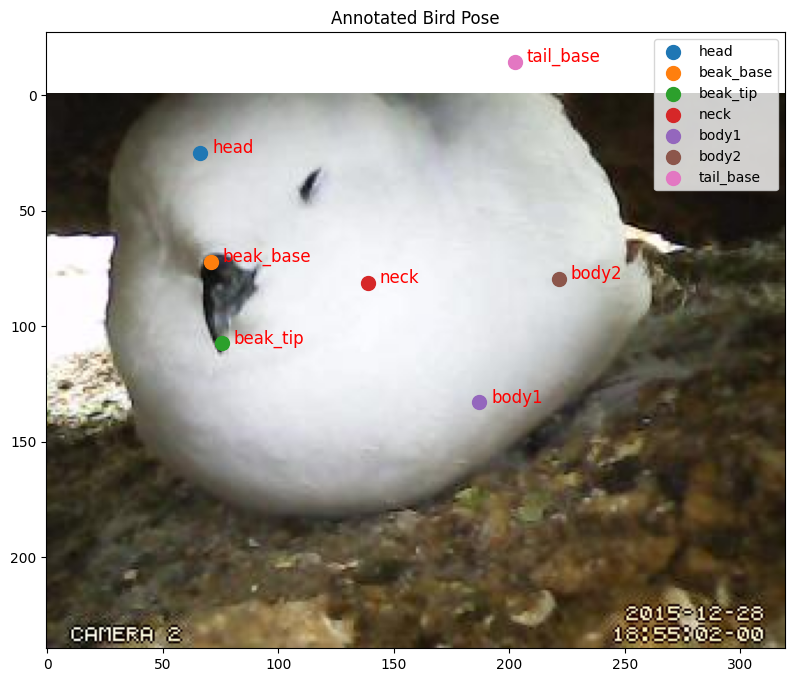

In [6]:
import matplotlib.pyplot as plt
from PIL import Image

# Coordinates and image details from the provided data
image_file = TEST + "/nesting" +  "/n_001" + "/24-20151228185502-00.jpg"
coordinates = {
    "head": (66.33090837, 25.051111635522663),
    "beak_base": (70.93817132891523, 72.14757747),
    "beak_tip": (75.54543429057158, 107.46992683848613),
    "neck": (139.02327954005898, 81.36210338910018),
    "body1": (187.1435815840252, 133.06583218102136),
    "body2": (221.72425033757838, 79.49077820829486),
    "tail_base": (202.7127407135686, -14.50868335)
}

# Open the image
img = Image.open(image_file)

# Plot the image
plt.figure(figsize=(10, 8))
plt.imshow(img)

# Plot the coordinates
for key, (x, y) in coordinates.items():
    plt.scatter(x, y, label=key, s=100)  # Scatter plot for each point
    plt.text(x + 5, y, key, color="red", fontsize=12)  # Label the points

plt.title("Annotated Bird Pose")
plt.axis("on")
plt.legend()
plt.show()
